In [1]:
#Importing Libraires
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split



## Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

## Set number of classes

In [5]:
NUM_CLASSES = 6

## Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=42)

# Model building

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [14]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 18s 626ms/step - accuracy: 0.1172 - loss: 2.0319
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1445 - loss: 1.9307 - val_accuracy: 0.3351 - val_loss: 1.6224
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2344 - loss: 1.6911
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2788 - loss: 1.6547 - val_accuracy: 0.3922 - val_loss: 1.5125
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4219 - loss: 1.5245
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3554 - loss: 1.5530 - val_accuracy: 0.4097 - val_loss: 1.4487
Epoch 4/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3906 - loss: 1.5070
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [17]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.9675 - loss: 0.2796


In [18]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.4701712e-01 6.1076008e-02 9.0209782e-02 5.2948069e-04 3.8257035e-04
 7.0078504e-01]
5


# Confusion matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


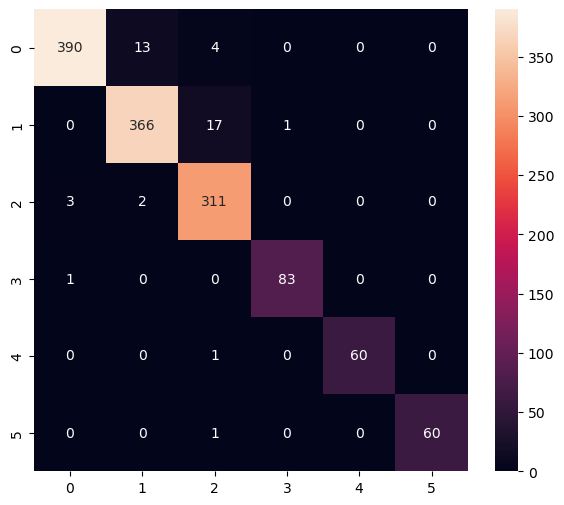

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       407
           1       0.96      0.95      0.96       384
           2       0.93      0.98      0.96       316
           3       0.99      0.99      0.99        84
           4       1.00      0.98      0.99        61
           5       1.00      0.98      0.99        61

    accuracy                           0.97      1313
   macro avg       0.98      0.98      0.98      1313
weighted avg       0.97      0.97      0.97      1313



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [23]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [24]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\cris3\AppData\Local\Temp\tmpujiyejd7\assets


INFO:tensorflow:Assets written to: C:\Users\cris3\AppData\Local\Temp\tmpujiyejd7\assets


Saved artifact at 'C:\Users\cris3\AppData\Local\Temp\tmpujiyejd7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2906520837904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2906520843664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2906520840592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2906520840784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2906541679504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2906541678928: TensorSpec(shape=(), dtype=tf.resource, name=None)


6624